# LangChain으로 데이터 분석하기2 - Excel

### 필요 모듈을 불러옵니다.

## 발급 받은 OpenAI key를 불러옵니다.

In [1]:
import os

os.environ["OPENAI_API_KEY"] = ""

## 데이터 시각화
- 전처리한 데이터프레임에 대해 LangChain을 이용하여 데이터 분석을 수행하고 시각화를 통해 인사이트를 추출해보도록 하겠습니다.

In [3]:
import pandas as pd

df = pd.read_csv("preprocessed_bus_data3.csv")

In [4]:
df

,노선번호,노선명,정류장ID,ARS번호,역명,승차총승객수,하차총승객수,연,월,일,총승객수
0,100,하계동~용산구청,100000002,01002,창경궁.서울대학교병원(00031),55.0,52.0,2024,9,1,107.0
1,9401-1,푸른마을~서울시중부기술교육원.블루스퀘어,206000695,07616,이매촌한신.서현역.AK프라자(00022),11.0,64.0,2024,9,1,75.0
2,9401-1,푸른마을~서울시중부기술교육원.블루스퀘어,206000613,47105,이매촌한신.서현역.AK프라자(00004),56.0,8.0,2024,9,1,64.0
3,9401-1,푸른마을~서울시중부기술교육원.블루스퀘어,206000537,47635,성남역.백현마을3단지(00021),1.0,7.0,2024,9,1,8.0
4,9401-1,푸른마을~서울시중부기술교육원.블루스퀘어,206000536,47634,백현마을4단지(00020),2.0,18.0,2024,9,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...
40145,서대문02,독립문역.천연뜨란채아파트~독립문극동아파트,112900062,13592,한국예술원(00008),23.0,7.0,2024,9,1,30.0
40146,서대문02,독립문역.천연뜨란채아파트~독립문극동아파트,112900062,13592,한국예술원(00037),11.0,28.0,2024,9,1,39.0
40147,N15,우이동성원아파트~남태령역,119000049,20142,엔지니어링회관(00080),2.0,0.0,2024,9,1,2.0
40148,서대문02,독립문역.천연뜨란채아파트~독립문극동아파트,112900069,13583,충정로역7번출구(00007),180.0,123.0,2024,9,1,303.0


### 이전 프로젝트에서 정의했던 reset_agent 함수를 다시 불러옵니다.

In [5]:
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI


def reset_agent(df, model='gpt-4o',temperature=0, verbose=True):
    return create_pandas_dataframe_agent(ChatOpenAI(temperature=0, model=model), df, verbose=verbose, allow_dangerous_code=True, handle_parsing_errors=True)

agent = reset_agent(df)

/home/elicer/.local/lib/python3.10/site-packages/langchain_experimental/agents/agent_toolkits/pandas/base.py:283: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(


#### 그래프에 한글 깨짐을 해결하기 위한 코드입니다. NanumGothic 폰트를 사용하겠습니다. - 출처: 네이버, 네이버 문화재단

In [6]:
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# 반드시 글꼴 주소 입력해주세요!
fe = fm.FontEntry(fname='NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})
plt.rcParams["axes.unicode_minus"] = False

#### 경고 메세지가 뜨지 않게 하기 위한 코드입니다.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Point 4. 총승객수 Box Plot 형태로 분포 분석



> Entering new AgentExecutor chain...
Thought: To create a box plot for the distribution of the '총승객수' column, I will use the `matplotlib` and `seaborn` libraries, which are commonly used for data visualization in Python. I will first import these libraries and then create a box plot.
Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a box plot for the '총승객수' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['총승객수'])

# Add title and labels
plt.title('Box Plot of Total Passengers (총승객수)', fontsize=14)
plt.ylabel('Total Passengers (총승객수)', fontsize=12)

# Show the plot
plt.show()
```ModuleNotFoundError: No module named 'seaborn'It seems that the `seaborn` library is not available in the current environment. I will use only `matplotlib` to create the box plot instead. `matplotlib` is a versatile library that can also be used to create box plots.

Let's pro

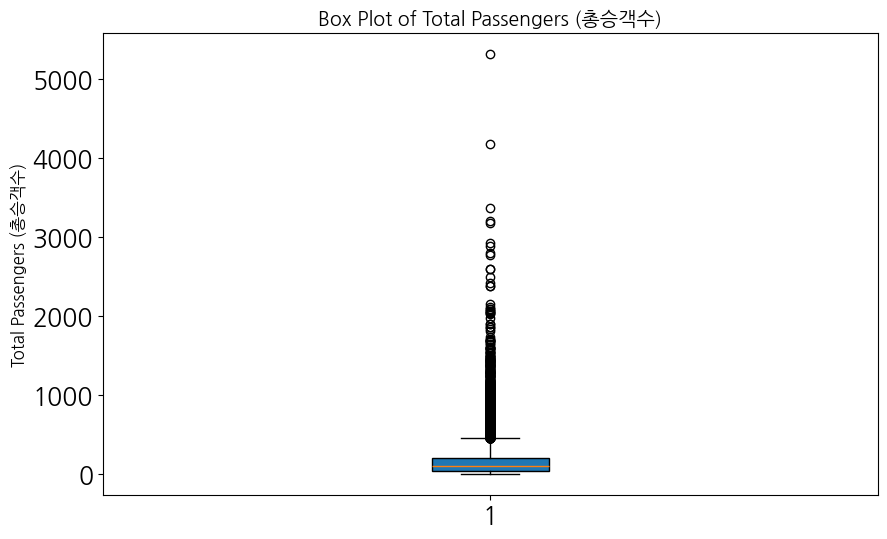

I have successfully created a box plot for the distribution of the '총승객수' column using `matplotlib`. The plot visually represents the distribution, central tendency, and variability of the total passengers data.

Final Answer: A box plot for the '총승객수' column has been created using `matplotlib`, showing the distribution of total passengers.

> Finished chain.


{'input': '총승객수 분포를 보여주는 Box Plot를 예쁘게 그려줘',
 'output': "A box plot for the '총승객수' column has been created using `matplotlib`, showing the distribution of total passengers."}

In [ ]:
# TODO: 이상치와 전체 데이터의 분포를 포함한 총승객수에 대한 박스 플롯을 그리는 프롬프트를 작성하고 실행해주세요.

agent.run("_____________________________")

### Point 5. 승차 인원과 하차 인원의 상관관계 분석




> Entering new AgentExecutor chain...
To create a scatter plot to analyze the correlation between `승차총승객수` and `하차총승객수`, we can use the `matplotlib` library in Python. Let's proceed with plotting the scatter plot.

Thought: I will use the `matplotlib.pyplot` library to create a scatter plot of `승차총승객수` vs `하차총승객수`.

Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['승차총승객수'], df['하차총승객수'], alpha=0.5)
plt.title('Scatter Plot of 승차총승객수 vs 하차총승객수')
plt.xlabel('승차총승객수')
plt.ylabel('하차총승객수')
plt.grid(True)
plt.show()
```


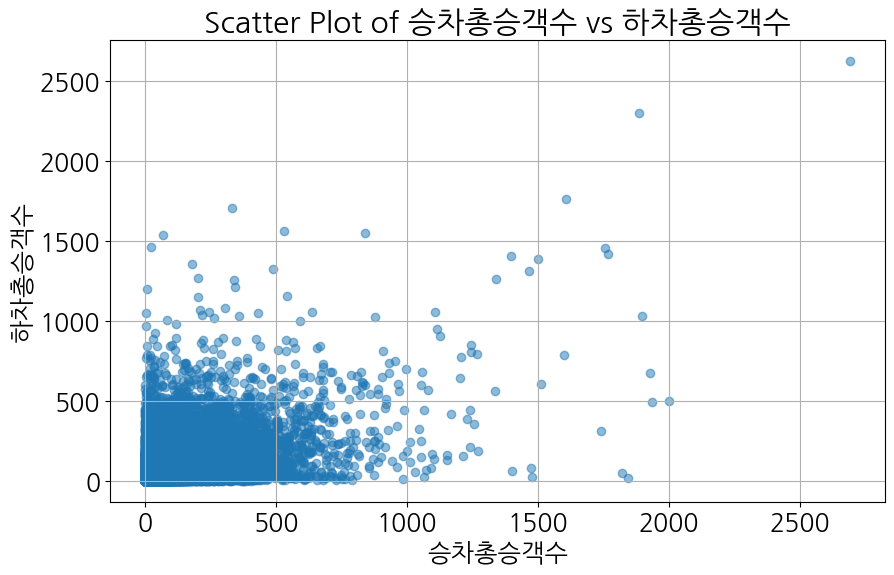

I have created a scatter plot to visualize the correlation between `승차총승객수` and `하차총승객수`. The plot displays the data points with `승차총승객수` on the x-axis and `하차총승객수` on the y-axis, allowing you to observe any potential correlation between these two variables.

Final Answer: A scatter plot has been created to analyze the correlation between `승차총승객수` and `하차총승객수`.

> Finished chain.


{'input': '승차총승객수와 하차총승객수 간의 상관관계를 분석하고 싶어. scatter plot으로 예쁘게 그려줄래?',
 'output': 'A scatter plot has been created to analyze the correlation between `승차총승객수` and `하차총승객수`.'}

In [ ]:
# TODO: 승차총승객수와 하차총승객수 간의 상관관계에 대한 scatter plot을 그리는 프롬프트를 작성하고 실행해주세요.

agent.invoke("__________________________")

### Point 6. 정류장 ID별 승차와 하차 인원 관계 분석



> Entering new AgentExecutor chain...
Thought: To create a scatter plot with a regression line, I will use the `matplotlib` and `seaborn` libraries. I will group the data by `정류장ID`, then plot `승차총승객수` on the x-axis and `하차총승객수` on the y-axis. I will use `seaborn` to add a regression line in red.
Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt
import seaborn as sns

# Group by '정류장ID' and sum '승차총승객수' and '하차총승객수'
grouped_df = df.groupby('정류장ID').sum()

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='승차총승객수', y='하차총승객수', data=grouped_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Scatter plot of 승차총승객수 vs 하차총승객수 by 정류장ID')
plt.xlabel('승차총승객수')
plt.ylabel('하차총승객수')
plt.grid(True)
plt.show()
```ModuleNotFoundError: No module named 'seaborn'It seems that the `seaborn` library is not available in the current environment. I will use `matplotlib` to create the scatter plot and add a regression line man

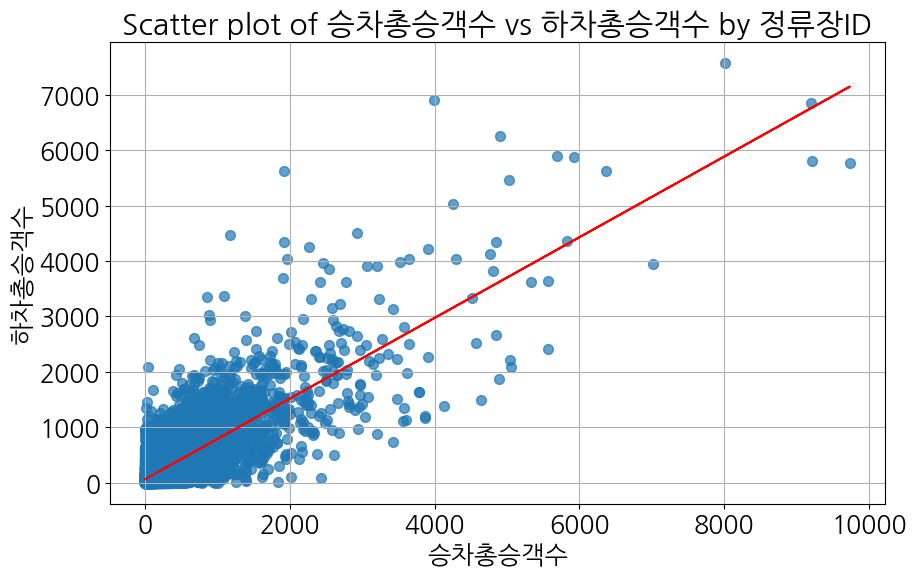

I have created a scatter plot of `승차총승객수` versus `하차총승객수` for each `정류장ID`, and added a regression line in red using `matplotlib` and `numpy`. 

Final Answer: A scatter plot with a regression line has been created using `matplotlib` and `numpy`, showing the relationship between `승차총승객수` and `하차총승객수` for each `정류장ID`.

> Finished chain.


{'input': '정류장ID를 기준으로 승차총승객수와 하차총승객수 사이의 관계를 scatter plot으로 그려줘. x축은 승차총승객수, y축은 하차총승객수로 표시하고 regression line을 빨간색으로 그려줘.',
 'output': 'A scatter plot with a regression line has been created using `matplotlib` and `numpy`, showing the relationship between `승차총승객수` and `하차총승객수` for each `정류장ID`.'}

In [ ]:
# TODO: 승차총승객수와 하차총승객수 간의 상관관계에 대한 scatter plot을 그리고 해당 regression line(회귀선)까지 그리는 프롬프트를 작성하고 실행해주세요.

agent.invoke("___________________")